# Quant

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

C:\Users\Chinmay\Python\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [36]:
ticker = 'BAC'
start = '2015-01-01'
end = '2020-01-01'
data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [37]:
## Computing  net returns

data['Ret'] = (data['Adj Close'] - data['Adj Close'].shift(-1))/data['Adj Close'].shift(-1)

In [38]:
## Computing log returns

data['logRet'] = (np.log(data['Adj Close']) - (np.log(data['Adj Close'].shift(-1))))

In [39]:
df = data[['Adj Close', 'Ret', 'logRet']]
df.head()

,Adj Close,Ret,logRet
Date,,,
2015-01-02,15.647725,0.029920,0.029481
2015-01-05,15.193153,0.030842,0.030376
2015-01-06,14.738579,-0.004723,-0.004734
2015-01-07,14.808517,-0.020243,-0.020451
2015-01-08,15.114480,0.018257,0.018092


In [40]:
df.dropna(inplace=True)
print(df.isnull().sum())

Adj Close    0
Ret          0
logRet       0
dtype: int64


<ipython-input-40-c3ca3ed608b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


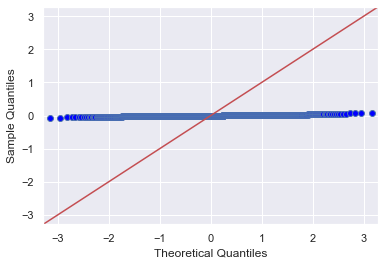

In [41]:
fig1 = sm.qqplot(df['Ret'], line='45')
plt.show()

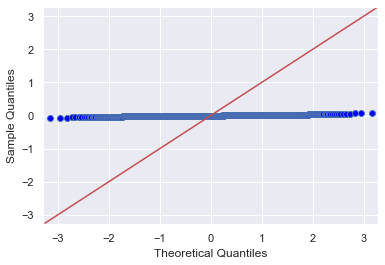

In [42]:
fig2 = sm.qqplot(df['logRet'], line='45')
plt.show()

C:\Users\Chinmay\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


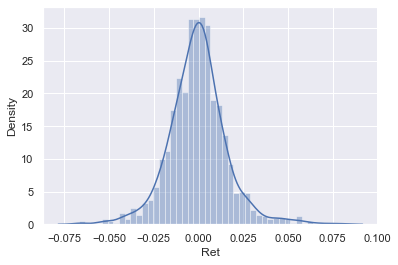

In [43]:
import seaborn as sns
sns.set(style='darkgrid')
sns.distplot(df['Ret'])
plt.show()

In [44]:
### Checking for normality

from scipy import stats
shapiro_wilk = stats.shapiro(df['Ret'])
print(shapiro_wilk)

ShapiroResult(statistic=0.9666235446929932, pvalue=2.0438744875079677e-16)


In [45]:
shapiro_wilk1 = stats.shapiro(df['logRet'])
print(shapiro_wilk1)

ShapiroResult(statistic=0.968550443649292, pvalue=6.895592520852404e-16)


### For low values of p-value, we reject the null hypothesis

In [46]:
df['expRet'] = np.exp(df['Ret'])
df.head()

<ipython-input-46-547efd686f3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expRet'] = np.exp(df['Ret'])


,Adj Close,Ret,logRet,expRet
Date,,,,
2015-01-02,15.647725,0.029920,0.029481,1.030372
2015-01-05,15.193153,0.030842,0.030376,1.031323
2015-01-06,14.738579,-0.004723,-0.004734,0.995288
2015-01-07,14.808517,-0.020243,-0.020451,0.979961
2015-01-08,15.114480,0.018257,0.018092,1.018425


### Performing exponential transformation on expRet

In [47]:
sw2 = stats.shapiro(df['expRet'])
print(sw2)

ShapiroResult(statistic=0.963927686214447, pvalue=4.0400043747571706e-17)


In [48]:
x = np.random.normal(loc=5, scale=3, size=100)
sw3 = stats.shapiro(x)
print(sw3)

ShapiroResult(statistic=0.9863349199295044, pvalue=0.39447522163391113)


### Log transform

In [49]:
df['lRet']= np.log(df['Ret'])
sw4 = stats.shapiro(df['lRet'])
print(sw4)

ShapiroResult(statistic=nan, pvalue=1.0)


C:\Users\Chinmay\Python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Chinmay\Python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-49-292f50149b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lRet']= np.log(df['Ret'])


In [50]:
df.head()

,Adj Close,Ret,logRet,expRet,lRet
Date,,,,,
2015-01-02,15.647725,0.029920,0.029481,1.030372,-3.509244
2015-01-05,15.193153,0.030842,0.030376,1.031323,-3.478862
2015-01-06,14.738579,-0.004723,-0.004734,0.995288,NaN
2015-01-07,14.808517,-0.020243,-0.020451,0.979961,NaN
2015-01-08,15.114480,0.018257,0.018092,1.018425,-4.003201


In [51]:
df['log'] = np.log(1+(df['Ret']))
sw5 = stats.shapiro(df['log'])
print(sw5)

ShapiroResult(statistic=0.968550443649292, pvalue=6.895592520852404e-16)


<ipython-input-51-6dc172c543f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log'] = np.log(1+(df['Ret']))
